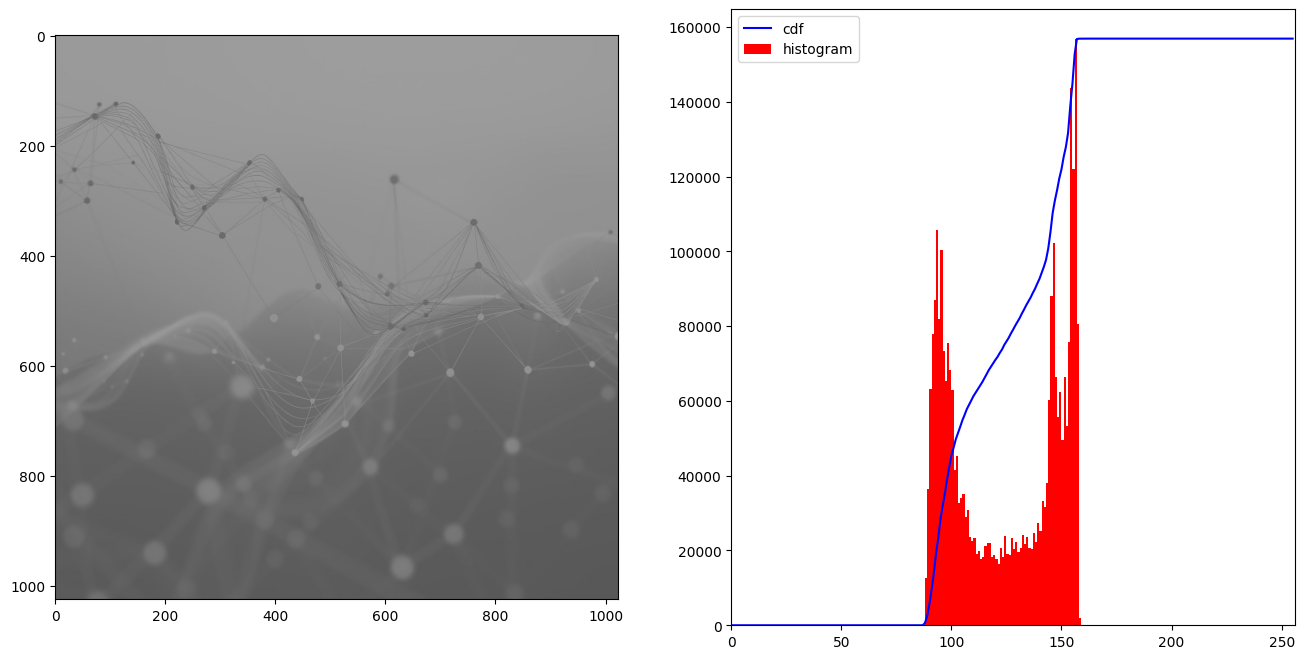

In [18]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('./images/image.jpg')
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(img)

axes[1].plot(cdf_normalized, color = 'b')
axes[1].hist(img.flatten(),256,[0,256], color = 'r')
axes[1].set_xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

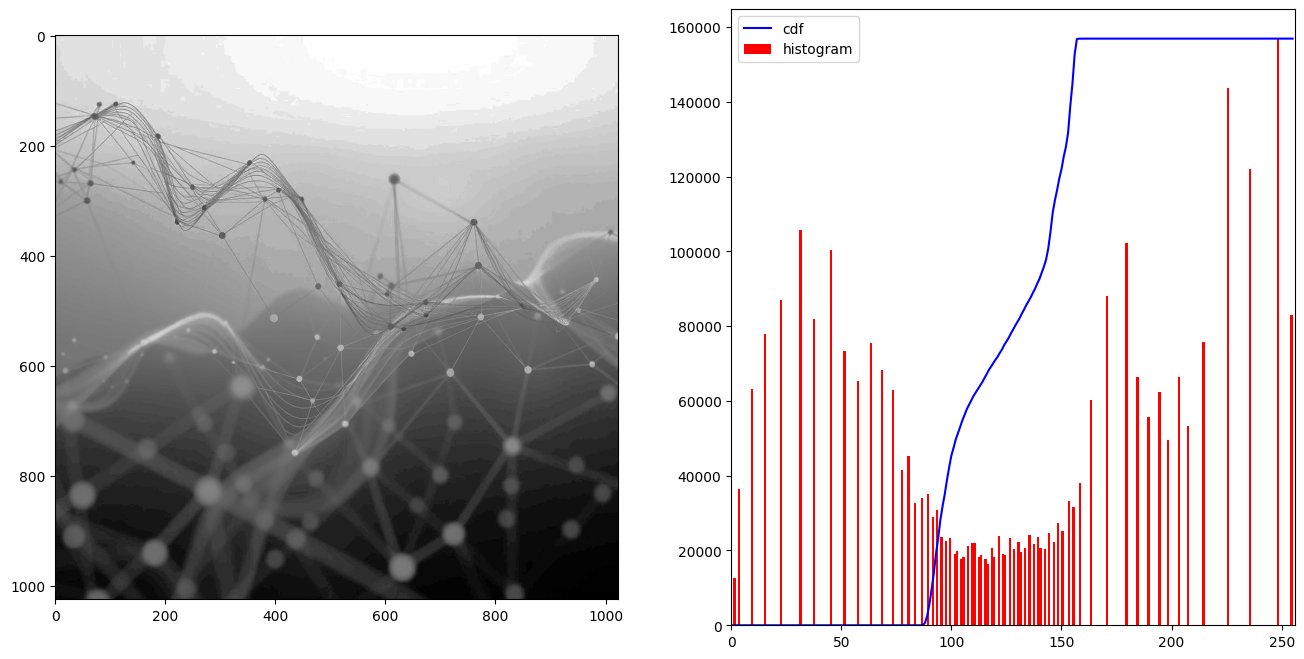

In [19]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(img2)

axes[1].plot(cdf_normalized, color = 'b')
axes[1].hist(img2.flatten(),256,[0,256], color = 'r')
axes[1].set_xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

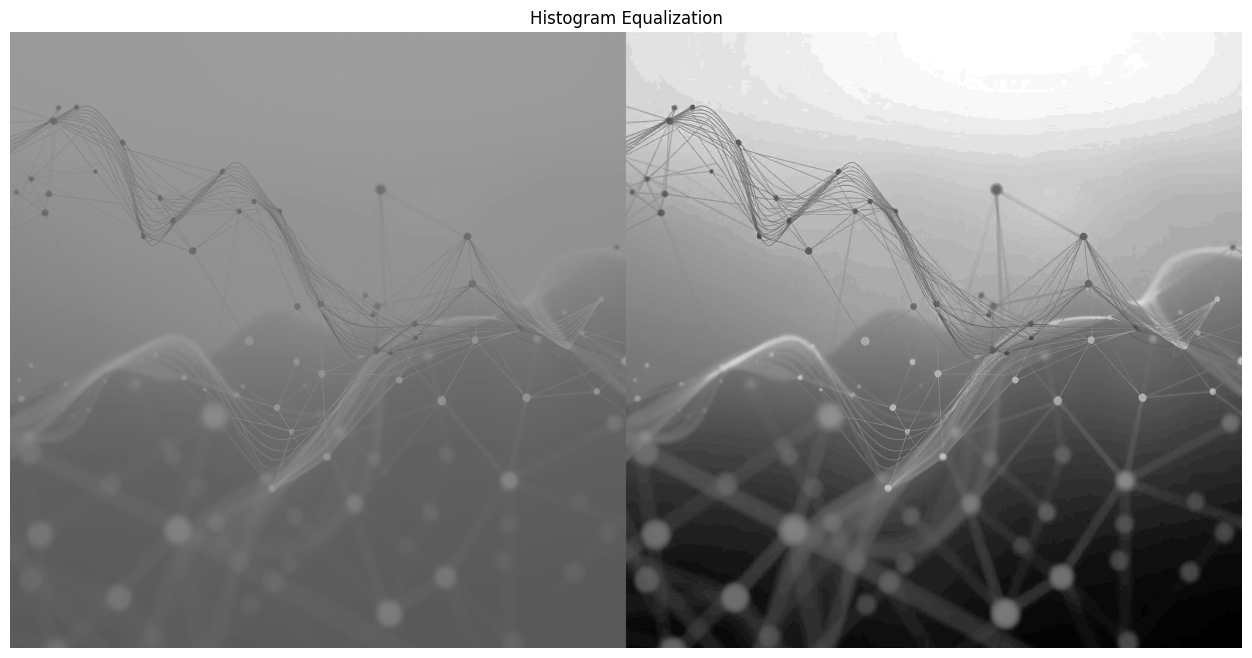

In [28]:
# Load the image in grayscale
gray = cv.imread('./images/image.jpg', cv.IMREAD_GRAYSCALE)

# Apply histogram equalization
equ = cv.equalizeHist(gray)

# Stack the original and equalized images side by side
res = np.hstack((gray, equ))

# Save the result
cv.imwrite('res.png', res)

# Plot the image, specifying that it's grayscale
plt.figure(figsize=(16, 8))
plt.imshow(res, cmap='gray')  # Use cmap='gray' to display it correctly
plt.title('Histogram Equalization')
plt.axis('off')  # Optional: Turn off axis for better display
plt.show()